# 2.2 Data Representations for Neural Networks

일반적으로 최근 기계 학습 프레임워크는 텐서를 기본 자료 구조로 사용

텐서는 숫자를 저장할 수 있는 컨테이너

## 2.2.1 Scalars (rank-0 텐서)

숫자 하나로만 표현하는 텐서는 스칼라라고 함(또는 스칼라 텐서, rank-0 tensor). numpy에서 float32 또는 float64 숫자는 스칼라 텐서. `ndim` 속성을 사용해서 numpy tensor의 축의 개수를 표시할 수 있음

In [44]:
import numpy as np

x = np.array(12)
print(x)
x.ndim

12


0

## 2.2.2 Vectors (rank-1 tensor)

숫자의 배열은 벡터(rank-1 tensor, 1D tensor)라고 함. 1D tensor는 축이 한 개임

In [45]:
x = np.array([1, 2, 4, 8, 16])
print(x)
x.ndim

[ 1  2  4  8 16]


1

코드에서 벡터 x는 원소가 다섯개 이기 때문에 5차원 벡터임.

## 2.2.3 Matrices (rank-2 tensors)

벡터의 배열은 행렬(rank-2 tensor, 2D tensor)이라고 함. 행렬은 두 개의 axes(rows, columns)를 갖고 있음. 행렬은 테이블로 생각할 수 있음

In [46]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 25, 1],
    [8, 89, 4, 38, 2]
])
x.ndim

2

첫 번째 axis를 rows, 두 번째 axis를 columns라고 함. 코드에서 `[5, 78, 2, 34, 0]` 가 첫 번재 행렬 x의 첫 번째 row 이고 `[5, 6, 8]` 이 행렬 x의 첫 번째 column

## 2.2.4 Rank-3 and higher-rank tensors

행렬을 새로운 배열에 쌓으면 rank-3 tensor가 됨(3D tensor). 숫자들의 큐브 형태로 생각할 수 있음 [그림 추가]

In [47]:
x = np.array([
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]]
])
x.ndim

3

## 2.2.5 Key attributes

- Number of axes(rank) : 텐서가 가지고 있는 축의 수
- Shape : a tuple of integer (텐서가 각 축에 대해서 가지고 있는 차원의 수)
- Data type (dtype in python library) : float16, float32, float64, uint8, ...

In [48]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


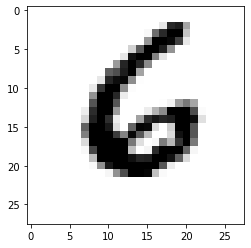

6


In [49]:
import matplotlib.pyplot as plt
index = 90
digit = train_images[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[index])

## 2.2.6 Manipulating tensors in Numpy

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)


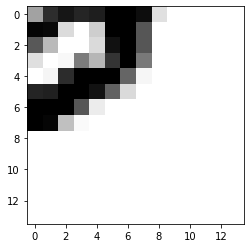

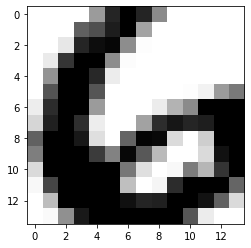

In [50]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice2 = train_images[10:100, :, :]
print(my_slice2.shape)
my_slice3 = train_images[10:100, 0:28, 0:28]
print(my_slice3.shape)
my_slice4 = train_images[:, 14:, 14:]
print(my_slice4.shape)
plt.imshow(my_slice4[index], cmap=plt.cm.binary)
plt.show()
my_slice5 = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice5[index], cmap=plt.cm.binary)
plt.show()

## 2.2.7 The notion of data batches

In [51]:
batch = train_images[:128]
print(batch.shape)
batch = train_images[128:256]
print(batch.shape)

n = 3
batch = train_images[128 * n:128 * (n + 1)]
print(batch.shape)

(128, 28, 28)
(128, 28, 28)
(128, 28, 28)


배치를 다룰 때 첫 번째 축(axis)를 배치 axis(batch dimension)라고 함

## 2.2.8 Real-world examples of data tensors

- Vector data : rank-2 tensor (samples, features)
- Timeseries data (sequence data) : rank-3 tensors (samples, teimesteps, features)
- Images : rank-4 tensors (samples, height, width, channels)
- Video : rank-5 tensor (samples, frames, height, width, channels)

## 2.2.9 Vector data

## 2.2.10 Timeseries data or sequence data

## 2.2.11 Image data

## 2.2.12 Video data